# Proyek Analisis Data: E-Commerce Public Dataset


## Menyaipkan semua library yang dibuthkan

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
from collections import Counter
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from googletrans import Translator
from pandas.tseries.offsets import MonthEnd
from datetime import datetime, timedelta



## Data Wrangling

### Gathering Data

In [140]:
# Membaca File CSV
customers_df = pd.read_csv(r".\E-Commerce Public Dataset\customers_dataset.csv")
# Menampilkan 5 teratas
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [141]:
geoloc_df=pd.read_csv(r"C:\Users\LENOVO\Documents\Kafin pinjem\Dicoding py for data analisys\Submission_Kafin\E-Commerce Public Dataset\geolocation_dataset.csv")
geoloc_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [142]:
orderitem_df=pd.read_csv(r"C:\Users\LENOVO\Documents\Kafin pinjem\Dicoding py for data analisys\Submission_Kafin\E-Commerce Public Dataset\order_items_dataset.csv")
orderitem_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [143]:
orderpayment_df=pd.read_csv(r"C:\Users\LENOVO\Documents\Kafin pinjem\Dicoding py for data analisys\Submission_Kafin\E-Commerce Public Dataset\order_payments_dataset.csv")
orderpayment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [144]:
orderreviews_df=pd.read_csv(r"C:\Users\LENOVO\Documents\Kafin pinjem\Dicoding py for data analisys\Submission_Kafin\E-Commerce Public Dataset\order_reviews_dataset.csv")
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [145]:
orders_df=pd.read_csv(r"C:\Users\LENOVO\Documents\Kafin pinjem\Dicoding py for data analisys\Submission_Kafin\E-Commerce Public Dataset\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [146]:
productcategory_df=pd.read_csv(r"C:\Users\LENOVO\Documents\Kafin pinjem\Dicoding py for data analisys\Submission_Kafin\E-Commerce Public Dataset\product_category_name_translation.csv")
productcategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [147]:
products_df=pd.read_csv(r"C:\Users\LENOVO\Documents\Kafin pinjem\Dicoding py for data analisys\Submission_Kafin\E-Commerce Public Dataset\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [148]:
sellers_df=pd.read_csv(r"C:\Users\LENOVO\Documents\Kafin pinjem\Dicoding py for data analisys\Submission_Kafin\E-Commerce Public Dataset\sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

1.Menilai Customer_Dataset

In [149]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


dapat dilihat dari tabel informasi mengenai dataset customers bahwa kolom no null untuk setiap kolom pada data set tidak memiliki missing values karena tidak ada perbedaan nilai antara satu sama lain, juga tidak memiliki kesalahan datatype untuk setiap jenis kolomnya.


In [150]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


lalu selanjutnya periksa duplikasi pada dataset customers, dapat dilihat bahwa tidak ada duplikasi pada dataset customers

In [151]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


lalu diperiksa apakah ada innacurate value pada dataset ini , dan tidak ditemukan innacurate value pada dataset ini.

2. Menilai Geo Location Dataset

In [152]:
geoloc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


dapat dilihat dari tabel informasi mengenai dataset geolocation bahwa kolom no null untuk setiap kolom pada data set tidak memiliki missing values karena tidak ada perbedaan nilai antara satu sama lain, juga tidak memiliki kesalahan datatype untuk setiap jenis kolomnya.


In [153]:
print("Jumlah duplikasi: ",geoloc_df.duplicated().sum())


Jumlah duplikasi:  261831


selanjutnya diperiksa duplikasi pada dataset, pada dataset ini terdapat banyak duplikasi sebanyak 261831

In [154]:
geoloc_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


lalu diperiksa apakah ada innacurate value pada dataset ini , dan tidak ditemukan innacurate value pada dataset ini.

3. Menilai Order Item dataset

In [155]:
orderitem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


dapat dilihat pada tabel info order item dataset tidak ada perbedaan nilai pada kolom nonull , yang membiktikan bahwa tidak ada missing value pada dataset order items, namun ada kesalahan datatype kolom shipping limit date disana tertulis object namun seharusnya datetime.

In [156]:
print("Jumlah duplikasi: ", orderitem_df.duplicated().sum())


Jumlah duplikasi:  0


diperiksa jumlah duplikasi pada dataset orderitem, dantidak ada duplikasi pada dataset ini

In [157]:
orderitem_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


lalu diperiksa apakah ada innacurate value pada dataset ini , dan tidak ditemukan innacurate value pada dataset ini.

4. Menilai Order Payment Dataset

In [158]:
orderpayment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


dapat dilihat pada tabel ini tidak ditemukan kesalahan missing value karena nilai no null pada kolom tidak ada perbedaan, juga datatype sudah sesuai 

In [159]:
print("Jumlah duplikasi: ", orderpayment_df.duplicated().sum())

Jumlah duplikasi:  0


pada dataset ini tidak ditemukan juga duplikasi

In [160]:
orderpayment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


lalu diperiksa apakah ada innacurate value pada dataset ini , dan tidak ditemukan innacurate value pada dataset ini.

5. Menilai Order Review Dataset

In [161]:
orderreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


pada data set orderreview ditemukan missing value karena ada perbedaan antara kolom pada no null, dan ada kesalahan data type pada kolom  review_creation_date dan review_answer_timestamp  harusnya datatime

In [162]:
orderreviews_df=pd.read_csv(r"C:\Users\LENOVO\Documents\Kafin pinjem\Dicoding py for data analisys\Submission_Kafin\E-Commerce Public Dataset\order_reviews_dataset.csv")
orderreviews_df.head()
orderreviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

diperiksa missing value yang dapatkan yaitu pada kolom review_comment_title sebanyak 87656 dan review_comment_message sebanyak 58247

In [163]:
print("Jumlah duplikasi: ", orderreviews_df.duplicated().sum())
orderreviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


lalu diperksa duplikasi dan innacurate value , tidak ditemukan kesalahan keduanya

6. Menilai Orders dataset

In [164]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


pada data set orders ditemukan missing value karena ada perbedaan antara kolom pada no null, dan ada kesalahan data type pada kolom  order_purchase_timestamp , order_approved_at, order_delivered_carrier_date, order_delivered_customer_date ,order_estimated_delivery_date   harusnya bertype datetime

In [165]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

ditemukan missing value pada kolom order_approved_at sebanyak 160, order_delivered_carrier_date sebanyak 1783 dan
order_delivered_customer_date sebanyak 2965

In [166]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


namun tidak ditemukan kesalahan duplikasi dan innacurate value

7. Menilai Product Category Dataset

In [167]:
productcategory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


pada dataset product tidak ditemukan kesalahan missing value maupun kesalahan datatype

In [168]:
print("Jumlah duplikasi: ", productcategory_df.duplicated().sum())
productcategory_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


dan pada dataset ini tidak ditemukan kesahalan duplikasi maupun innacurate values

8. Menilai Products Dataset

In [169]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Pada dataset product ditemukan kesalahan missing value , namun tidak ada kesalahan pada datatype

In [170]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

pada tabel diatas menunjukan missing value pada setiap kolomnya

In [171]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


namun tidak didapatkan kesalahan duplikasi dan inaccurate value

9. Menilai Sellers dataset

In [172]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


tidak ditemukan kesalahan missing value dan datatype pada dataset sellers

In [173]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


tidak ditemukan kesalahan duplikasi dan innacurate value pada dataset ini

sehingga dapat disimpilkan pada prosess assesing data ini , terdapat 5 file yang bermasalah yaitu : 
1. geolocation terdapat duplikasi
2. orderitems kesalahan datatype
3. orderreview terdapat missing value dan kesalahan datatype
4. orders terdapat missing value dan kesalahan datatype
5. products terdapat missing value

### Cleaning Data

Geolocation Dataset

1. Duplicates

untuk menghilangkan duplikat dilakukan pembersihan dengan menghapus duplikasi pada dataset geolocation

In [174]:
geoloc_df.drop_duplicates(inplace=True)

In [175]:
print("Jumlah duplikasi: ", geoloc_df.duplicated().sum())

Jumlah duplikasi:  0


pastikan kembali jumlah duplikasi , setelah pembersihan jumlahnya menjadi 0


Order Item

1. Ketidak sesuaian datatype

In [176]:
orderitem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [177]:
datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  orderitem_df[column] = pd.to_datetime(orderitem_df[column])
  
orderitem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


tipe data kolom shipping_limit_date dari object sudah berubah menjadi datetime

Order Review

1.Missing Value

In [178]:
orderreviews_df=pd.read_csv(r"C:\Users\LENOVO\Documents\Kafin pinjem\Dicoding py for data analisys\Submission_Kafin\E-Commerce Public Dataset\order_reviews_dataset.csv")
orderreviews_df.head()
orderreviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [179]:
orderreviews_df[orderreviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


jika dapat kita lihat pada tabel diatas pada kolom review comment title perannya cukup baik , sehingga informasi akan disayangkan jika dihapus

In [180]:
import pandas as pd

# Membagi dataset berdasarkan review score
review_score_1 = orderreviews_df[orderreviews_df['review_score'] == 1]
review_score_2 = orderreviews_df[orderreviews_df['review_score'] == 2]
review_score_3 = orderreviews_df[orderreviews_df['review_score'] == 3]
review_score_4 = orderreviews_df[orderreviews_df['review_score'] == 4]
review_score_5 = orderreviews_df[orderreviews_df['review_score'] == 5]


In [181]:
review_score_1.isna().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title       9551
review_comment_message     2679
review_creation_date          0
review_answer_timestamp       0
dtype: int64

In [182]:
review_score_1.review_comment_title.value_counts()

review_comment_title
Não recomendo              44
Ruim                       37
não recomendo              34
Não recebi o produto       30
Produto errado             30
                           ..
Não recebi ainda            1
Comprei dois filtros...     1
Irritante                   1
nao funciona telefones      1
Empres não confiável        1
Name: count, Length: 1217, dtype: int64

lalu lihat isi kolom terbanyak yaitu Recomendo, ini akan digunakan untuk mengisi nilai yang hilang pada kolom ini

In [183]:
review_score_1['review_comment_title'].fillna(value='Não recomendo', inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\3412612011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_1['review_comment_title'].fillna(value='Não recomendo', inplace=True)


In [184]:
review_score_1.isna().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title          0
review_comment_message     2679
review_creation_date          0
review_answer_timestamp       0
dtype: int64

setelah kolom missing value di isi, maka sudah tidak ada lagi missing value

In [185]:
review_score_1.review_comment_message.value_counts()

review_comment_message
Não recebi o produto                                                                                                                                                               30
Não recebi o produto                                                                                                                                                               12
Não recebi                                                                                                                                                                         11
Ainda não recebi                                                                                                                                                                   10
Ainda não recebi o produto                                                                                                                                                         10
                                                                   

In [186]:
review_score_1['review_comment_message'].fillna(value='Não recebi o produto', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\1504097831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_1['review_comment_message'].fillna(value='Não recebi o produto', inplace=True)


In [187]:
review_score_1.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [188]:
review_score_2.isna().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title       2673
review_comment_message     1006
review_creation_date          0
review_answer_timestamp       0
dtype: int64

In [189]:
review_score_2.review_comment_title.value_counts()

review_comment_title
Ruim                   8
Bom                    8
Não recomendo          7
não recomendo          7
Produto com defeito    7
                      ..
Nota fiscal            1
maravilhoso            1
PRODUTO AVARIADO       1
Faltando a máscara     1
Foto enganosa          1
Name: count, Length: 400, dtype: int64

In [190]:
review_score_2['review_comment_title'].fillna(value='Ruim', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\2093368287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_2['review_comment_title'].fillna(value='Ruim', inplace=True)


In [191]:
review_score_2.isna().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title          0
review_comment_message     1006
review_creation_date          0
review_answer_timestamp       0
dtype: int64

In [192]:
review_score_2.review_comment_message.value_counts()

review_comment_message
ok                                                                                                                                                                                                       4
Bom                                                                                                                                                                                                      3
Não recebi o produto                                                                                                                                                                                     3
Ainda não recebi o produto                                                                                                                                                                               3
O produto veio com defeito! Espero que não demore muito a troca pois foi comprada para presentear!                                                                   

In [193]:
review_score_2['review_comment_message'].fillna(value='Não recebi o produto', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\280514718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_2['review_comment_message'].fillna(value='Não recebi o produto', inplace=True)


In [194]:
review_score_2.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [195]:
review_score_3.isna().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title       7355
review_comment_message     4622
review_creation_date          0
review_answer_timestamp       0
dtype: int64

In [196]:
review_score_3.review_comment_title.value_counts()

review_comment_title
Bom                          57
recomendo                    28
Recomendo                    26
bom                          17
Boa                           9
                             ..
Instisfeito                   1
Esperava mais                 1
acabamento                    1
Produto parece ser simila     1
Não foi entregue o pedido     1
Name: count, Length: 571, dtype: int64

In [197]:
review_score_3['review_comment_title'].fillna(value='Bom', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\3386203614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_3['review_comment_title'].fillna(value='Bom', inplace=True)


In [198]:
review_score_3.isna().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title          0
review_comment_message     4622
review_creation_date          0
review_answer_timestamp       0
dtype: int64

In [199]:
review_score_3.review_comment_message.value_counts()

review_comment_message
Bom                                                                                                                              33
bom                                                                                                                              22
Muito bom                                                                                                                        11
Boa                                                                                                                               9
Ok                                                                                                                                8
                                                                                                                                 ..
Eu só quero saber cadê meu pedido que não chegou ainda ? Pois já venceu o prazo                                                   1
em nenhum momento do anuncio o vendedor expôs que o p

In [200]:
review_score_3['review_comment_message'].fillna(value='Bom', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\1229450701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_3['review_comment_message'].fillna(value='Bom', inplace=True)


In [201]:
review_score_3.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [202]:
review_score_4.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       17407
review_comment_message     13166
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [203]:
review_score_4.review_comment_title.value_counts()

review_comment_title
recomendo           125
Recomendo           121
Bom                  95
Muito bom            60
Boa                  45
                   ... 
Entrega demorada      1
Entregue              1
Indico                1
Relógio               1
👍                     1
Name: count, Length: 746, dtype: int64

In [204]:
review_score_4['review_comment_title'].fillna(value='recomendo', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\3450684089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_4['review_comment_title'].fillna(value='recomendo', inplace=True)


In [205]:
review_score_4.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title           0
review_comment_message     13166
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [206]:
review_score_4.review_comment_message.value_counts()

review_comment_message
Bom                                                                                                                                                                                                          66
Muito bom                                                                                                                                                                                                    44
bom                                                                                                                                                                                                          36
muito bom                                                                                                                                                                                                    27
Recomendo                                                                                                                                        

In [207]:
review_score_4['review_comment_message'].fillna(value='Bom', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\3421572607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_4['review_comment_message'].fillna(value='Bom', inplace=True)


In [208]:
review_score_4.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [209]:
review_score_5.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       50670
review_comment_message     36774
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [210]:
review_score_5.review_comment_title.value_counts()

review_comment_title
Recomendo                    276
super recomendo              244
Excelente                    239
Ótimo                        207
Super recomendo              199
                            ... 
Mercadoria recebida            1
Aparador de livros abraço      1
Óculos feminino                1
Compraria Novamente            1
OTIMA EMBALAGEM                1
Name: count, Length: 2172, dtype: int64

In [211]:
review_score_5['review_comment_title'].fillna(value='Recomendo', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\67234388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_5['review_comment_title'].fillna(value='Recomendo', inplace=True)


In [212]:
review_score_5.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title           0
review_comment_message     36774
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [213]:
review_score_5.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                       175
muito bom                                                                                                                                                        90
Otimo                                                                                                                                                            85
Bom                                                                                                                                                              83
otimo                                                                                                                                                            81
                                                                                                                                                             

In [214]:
review_score_5['review_comment_message'].fillna(value='Muito bom', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\3036775347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_5['review_comment_message'].fillna(value='Muito bom', inplace=True)


In [215]:
review_score_5.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

2. Data type

In [216]:
review_score_1.info()
review_score_2.info()
review_score_3.info()
review_score_4.info()
review_score_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11424 entries, 5 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                11424 non-null  object
 1   order_id                 11424 non-null  object
 2   review_score             11424 non-null  int64 
 3   review_comment_title     11424 non-null  object
 4   review_comment_message   11424 non-null  object
 5   review_creation_date     11424 non-null  object
 6   review_answer_timestamp  11424 non-null  object
dtypes: int64(1), object(6)
memory usage: 714.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3151 entries, 16 to 99203
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                3151 non-null   object
 1   order_id                 3151 non-null   object
 2   review_score             3151 non-null   int64 


In [217]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  review_score_1[column] = pd.to_datetime(review_score_1[column])

for column in datetime_columns:
  review_score_2[column] = pd.to_datetime(review_score_2[column])

for column in datetime_columns:
  review_score_3[column] = pd.to_datetime(review_score_3[column])

for column in datetime_columns:
  review_score_4[column] = pd.to_datetime(review_score_4[column])

for column in datetime_columns:
  review_score_5[column] = pd.to_datetime(review_score_5[column])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\720512022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_1[column] = pd.to_datetime(review_score_1[column])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\720512022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_score_1[column] = pd.to_datetime(review_score_1[column])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4004\720512022.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

mengganti kolom review_creation_date,review_answer_timestamp dengan tide data date time

In [218]:
review_score_1.info()
review_score_2.info()
review_score_3.info()
review_score_4.info()
review_score_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11424 entries, 5 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                11424 non-null  object        
 1   order_id                 11424 non-null  object        
 2   review_score             11424 non-null  int64         
 3   review_comment_title     11424 non-null  object        
 4   review_comment_message   11424 non-null  object        
 5   review_creation_date     11424 non-null  datetime64[ns]
 6   review_answer_timestamp  11424 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 714.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3151 entries, 16 to 99203
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                3151 non-null   object

datattype sudah berubah dan sesuai

Orders Dataset

1.Missing Value

In [219]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [220]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [221]:
orders_df.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: count, Length: 95664, dtype: int64

pada kolom order_delivered customer_date dilihat bahwa nilai 2018-05-08 23:38:46 adalah terbanyak dan akan dijadikan nilai yang mengisi missing value

In [222]:
orders_df['order_delivered_customer_date'].fillna(value="2018-05-08 23:38:46", inplace=True)

In [223]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date       0
order_estimated_delivery_date       0
dtype: int64

setelah diisi kolom order_delivered_customer_date , tidak memiliki missing value

In [224]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,2018-05-08 23:38:46,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,2018-05-08 23:38:46,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,2018-05-08 23:38:46,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,2018-05-08 23:38:46,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,2018-05-08 23:38:46,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,2018-05-08 23:38:46,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,2018-05-08 23:38:46,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,2018-05-08 23:38:46,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,2018-05-08 23:38:46,2017-09-15 00:00:00


In [225]:
orders_df.order_delivered_carrier_date.value_counts()

order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: count, Length: 81018, dtype: int64

pada kolom order_delivered_carrier_date dapat dilihat nilai 2018-05-09 15:48:00 adalah nilai terbanyak, lalu akan digunakan untuk mengisi nilai missing value

In [226]:
orders_df['order_delivered_carrier_date'].fillna(value="2018-05-09 15:48:00", inplace=True)

In [227]:
orders_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
dtype: int64

setelag diisi ,maka order_delivered_carrier_date  tidak ada missing value

In [228]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-10-01 00:00:00


In [229]:
orders_df.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: count, Length: 90733, dtype: int64

sama hal nya dengan yang diatas nilai terbanyak yaitu 2018-02-27 04:31:10 akan digunakan untuk mengisi missing value

In [230]:
orders_df['order_approved_at'].fillna(value="2018-02-27 04:31:10", inplace=True)

In [231]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

sehingga tidak ada lagi missing value pada dataset ini

2.Data Type

In [232]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [233]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column]= pd.to_datetime(orders_df[column])


In [234]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


setelah diubah kolom ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"] sudah berganti datatype nya menjadi datetime

Products Dataset

1. Missing Value

In [235]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [236]:
products_df.dropna(inplace=True)

In [237]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

In [238]:
import pandas as pd

# Gabungkan berdasarkan baris
orderreviews_lowrate_df = pd.concat([review_score_1, review_score_2], axis=0)

# Reset indeks jika diperlukan
orderreviews_lowrate_df.reset_index(drop=True, inplace=True)
orderreviews_lowrate_df.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Não recomendo,Não recebi o produto,2018-04-13,2018-04-16 00:39:37
1,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15,2018-08-15 04:10:37
2,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,Não recomendo,Não gostei ! Comprei gato por lebre,2017-12-13,2017-12-16 07:14:07
3,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,Não recomendo,Sempre compro pela Internet e a entrega ocorre...,2018-04-08,2018-04-09 12:22:39
4,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,Não recomendo,Nada de chegar o meu pedido.,2017-04-21,2017-04-23 05:37:03


In [239]:
import nltk
from nltk.tokenize import word_tokenize
nltk.data.path.append(r"c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\nltk_data")


In [240]:
import nltk
nltk.download('punkt')
print(nltk.__version__)

3.8.1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [241]:
# Memastikan bahasa Portugis terunduh
import nltk
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [242]:
# Lowercasing
orderreviews_lowrate_df['review_comment_message'] = orderreviews_lowrate_df['review_comment_message'].str.lower()

# Pembersihan teks
def clean_text(text):
    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

orderreviews_lowrate_df['review_comment_message'] = orderreviews_lowrate_df['review_comment_message'].apply(clean_text)

# Tokenisasi
orderreviews_lowrate_df['tokens'] = orderreviews_lowrate_df['review_comment_message'].apply(word_tokenize)

# Stopword Removal
# Menggunakan stopwords bahasa Portugis
stop_words_portuguese = set(stopwords.words('portuguese'))
# Menghapus stopwords bahasa Portugis
orderreviews_lowrate_df['tokens'] = orderreviews_lowrate_df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words_portuguese])

# stemming
ps = PorterStemmer()
orderreviews_lowrate_df['stemmed_tokens'] = orderreviews_lowrate_df['tokens'].apply(lambda tokens: [ps.stem(word.lower()) for word in tokens])


# Tampilkan hasil
orderreviews_lowrate_df.head()



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,tokens,stemmed_tokens
0,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Não recomendo,não recebi o produto,2018-04-13,2018-04-16 00:39:37,"[recebi, produto]","[recebi, produto]"
1,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,péssimo,2018-08-15,2018-08-15 04:10:37,[péssimo],[péssimo]
2,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,Não recomendo,não gostei comprei gato por lebre,2017-12-13,2017-12-16 07:14:07,"[gostei, comprei, gato, lebre]","[gostei, comprei, gato, lebr]"
3,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,Não recomendo,sempre compro pela internet e a entrega ocorre...,2018-04-08,2018-04-09 12:22:39,"[sempre, compro, internet, entrega, ocorre, an...","[sempr, compro, internet, entrega, ocorr, ant,..."
4,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,Não recomendo,nada de chegar o meu pedido,2017-04-21,2017-04-23 05:37:03,"[nada, chegar, pedido]","[nada, chegar, pedido]"


In [243]:

# Menggabungkan semua teks dalam kolom stemmed_tokens
all_stemmed_tokens = ' '.join(orderreviews_lowrate_df['stemmed_tokens'].apply(' '.join))

# Tokenisasi teks (mengubah teks menjadi daftar kata)
tokens = all_stemmed_tokens.split()

# Menghitung frekuensi kata
word_frequencies = Counter(tokens)

# Ambil 10 kata yang paling sering muncul
top_words = word_frequencies.most_common(10)

# Menyimpan hasil dalam DataFrame untuk plotting
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
top_words_df.head()


# # Plotting hasil
# plt.figure(figsize=(10, 6))
# plt.bar(top_words_df['Word'], top_words_df['Frequency'])
# plt.xlabel('Words')
# plt.ylabel('Frequency')
# plt.title('Top 10 Most Commonly Mentioned Words')
# plt.xticks(rotation=45)
# plt.show()


,Word,Frequency
0,produto,10323
1,recebi,6941
2,comprei,1865
3,veio,1535
4,entrega,1420


In [244]:
# Membuat DataFrame baru untuk menyimpan hasil preprocessing
processed_reviews_df = orderreviews_lowrate_df.copy()

# Lowercasing
processed_reviews_df["review_comment_message"] = processed_reviews_df[
    "review_comment_message"
].str.lower()


# Pembersihan teks
def clean_text(text):
    # Check if the value is a string (not NaN)
    if isinstance(text, str):
        # Hapus tanda baca
        text = text.translate(str.maketrans("", "", string.punctuation))
    return text


# Apply the clean_text function, handling NaN values
processed_reviews_df["cleaned_review_comment"] = processed_reviews_df[
    "review_comment_message"
].apply(lambda x: clean_text(x) if pd.notnull(x) else x)


# Tokenisasi
processed_reviews_df["tokens"] = processed_reviews_df["cleaned_review_comment"].apply(
    lambda x: word_tokenize(x) if isinstance(x, str) else []
)

# Stopword Removal
stop_words = set(stopwords.words("english"))
processed_reviews_df["tokens"] = processed_reviews_df["tokens"].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

# Stemming
ps = PorterStemmer()
processed_reviews_df["stemmed_tokens"] = processed_reviews_df["tokens"].apply(
    lambda tokens: [ps.stem(word) for word in tokens]
)

# Tampilkan hasil
processed_reviews_df.head()

# Simpan DataFrame ke dalam file CSV
processed_reviews_df.to_csv('processed_reviews.csv', index=False)


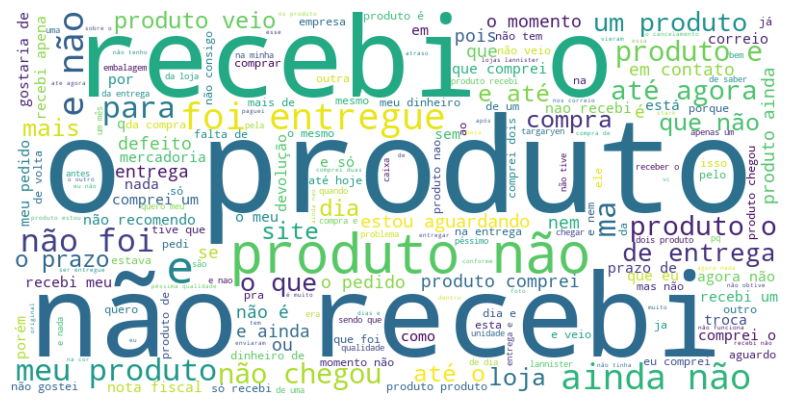

In [245]:
# Gabungkan semua teks menjadi satu string
all_text = ' '.join(orderreviews_lowrate_df['review_comment_message'].astype(str))

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [246]:
# Fungsi untuk mendapatkan trigram dari sebuah teks
def extract_trigrams(text):
    words = text.split()
    return [f"{words[i]} {words[i+1]} {words[i+2]}" for i in range(len(words) - 2)]

# Menggabungkan semua teks dalam kolom review_comment_message
all_comments = ' '.join(orderreviews_lowrate_df['review_comment_message'].dropna())

# Ekstraksi trigram dari teks panjang
all_trigrams = extract_trigrams(all_comments)

# Menghitung jumlah munculnya masing-masing trigram
trigram_counts = Counter(all_trigrams)

# Menghitung total trigram dalam dataset
total_trigrams = len(all_trigrams)

# Menghitung persentase masing-masing trigram
trigram_percentages = {trigram: (count / total_trigrams) * 100 for trigram, count in trigram_counts.items()}

# Mengurutkan trigram berdasarkan frekuensi tertinggi
sorted_trigrams = dict(sorted(trigram_counts.items(), key=lambda item: item[1], reverse=True))

# Menampilkan 10 trigram teratas
top_10_trigrams = dict(list(sorted_trigrams.items())[:10])

# Initialize the translator
translator = Translator()
# Fungsi untuk menerjemahkan trigram ke bahasa Indonesia
def translate_to_indonesian(trigram):
    try:
        # Translate trigram to Indonesian
        translated = translator.translate(trigram, src='pt', dest='id')
        return translated.text
    except Exception as e:
        print(f"Translation failed for {trigram}: {str(e)}")
        return trigram

#  Menampilkan hasil dengan trigram diterjemahkan ke bahasa Indonesia
print("Top 10 Trigram (Terjemahan ke Bahasa Indonesia):")
for trigram, count in top_10_trigrams.items():
    translated_trigram = translate_to_indonesian(trigram)
    print(f"{translated_trigram}: {count} kali, {trigram_percentages[trigram]:.2f}%")


Top 10 Trigram (Terjemahan ke Bahasa Indonesia):
Saya menerima produk: 4609 kali, 2.27%
Saya tidak menerima: 4446 kali, 2.19%
Produk tidak: 1807 kali, 0.89%
Produk tidak menerima: 1346 kali, 0.66%
tidak dikirim: 407 kali, 0.20%
Saya belum menerimanya: 404 kali, 0.20%
produk o: 368 kali, 0.18%
produk yang dibeli: 267 kali, 0.13%
sampai sekarang: 248 kali, 0.12%
Produk Produk: 245 kali, 0.12%


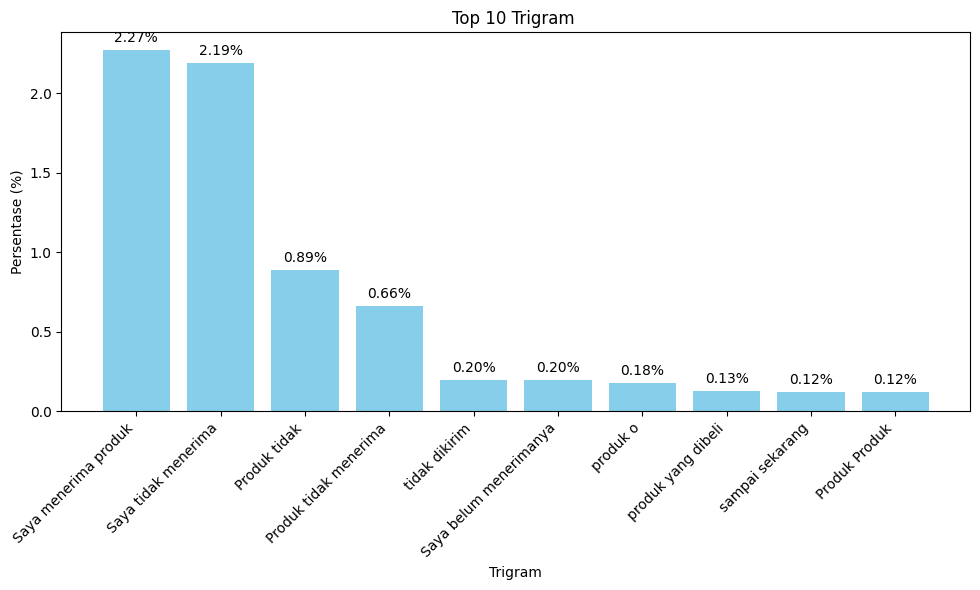

In [247]:
import matplotlib.pyplot as plt

# Data
trigrams = [
    "Saya menerima produk",
    "Saya tidak menerima",
    "Produk tidak",
    "Produk tidak menerima",
    "tidak dikirim",
    "Saya belum menerimanya",
    "produk o",
    "produk yang dibeli",
    "sampai sekarang",
    "Produk Produk"
]
counts = [4609, 4446, 1807, 1346, 407, 404, 368, 267, 248, 245]
percentages = [2.27, 2.19, 0.89, 0.66, 0.20, 0.20, 0.18, 0.13, 0.12, 0.12]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(trigrams, percentages, color='skyblue')
ax.set_ylabel('Persentase (%)')
ax.set_xlabel('Trigram')
ax.set_title('Top 10 Trigram ')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the percentages on top of the bars
for i in range(len(trigrams)):
    ax.text(i, percentages[i] + 0.05, f'{percentages[i]:.2f}%', ha='center')

plt.tight_layout()
plt.show()


In [287]:
# Ekstraksi fitur menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(orderreviews_lowrate_df['review_comment_message'])

# Lakukan K-means clustering dengan inisialisasi yang stabil menggunakan random_state
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Tambahkan label kluster ke DataFrame
orderreviews_lowrate_df['cluster_label'] = kmeans.labels_

# Evaluasi hasil clustering
cluster_counts = orderreviews_lowrate_df['cluster_label'].value_counts()
total_data = len(orderreviews_lowrate_df)
cluster_percentages = (cluster_counts / total_data) * 100

# Menampilkan jumlah data dan persentase masing-masing cluster
for label, count, percentage in zip(cluster_counts.index, cluster_counts, cluster_percentages):
    print(f"Cluster Label {label}: {count} data ({percentage:.2f}%)")


Cluster Label 2: 9103 data (62.46%)
Cluster Label 3: 3825 data (26.24%)
Cluster Label 0: 1022 data (7.01%)
Cluster Label 1: 625 data (4.29%)


In [289]:
unique_labels = orderreviews_lowrate_df['cluster_label'].value_counts()

# Tampilkan isi dari setiap cluster untuk 5 cluster teratas
num_clusters_to_display = 5

for idx, label in enumerate(unique_labels.index):
    if idx >= num_clusters_to_display:
        break

    cluster_data = orderreviews_lowrate_df[orderreviews_lowrate_df['cluster_label'] == label]['review_comment_message']
    cluster_texts = cluster_data.tolist()[:5]  
    
    print("Cluster Label:", label)
    for idx, original_text in enumerate(cluster_texts):
        print(f"Text {idx + 1}: {original_text}")
   


Cluster Label: 2
Text 1: péssimo
Text 2: não gostei  comprei gato por lebre
Text 3: sempre compro pela internet e a entrega ocorre antes do prazo combinado que acredito ser o prazo máximo no stark o prazo máximo já se esgotou e ainda não recebi o produto
Text 4: nada de chegar o meu pedido
Text 5: recebi somente 1 controle midea split estilo
faltou controle remoto para ar condicionado consul
Cluster Label: 3
Text 1: não recebi o produto
Text 2: não recebi o produto
Text 3: não recebi o produto
Text 4: não recebi o produto
Text 5: não recebi o produto
Cluster Label: 0
Text 1: este foi o pedido
balde com 128 peças  blocos de montar 2 un  r 2500 cada não foi entregue
vendido e entregue targaryen
tapete de eva nº letras 36 peças crianças 1 un  r 3590 este foi entreg
Text 2: comprei o produto dia 25 de fevereiro e hoje dia 29 de marco não fora entregue na minha residência não sei se os correios desse brasil e péssimo ou foi a própria loja que demorou postar
Text 3: aqui está descrevendo com

In [279]:
from googletrans import Translator

# Fungsi untuk menerjemahkan teks ke Bahasa Indonesia
def translate_to_indonesian(text):
    try:
        translator = Translator()
        translation = translator.translate(text, src='pt', dest='id')
        if translation and translation.text:
            return translation.text
        else:
            return 'Translation failed'
    except Exception as e:
        return 'Translation failed: ' + str(e)

# Teks dalam setiap cluster
cluster_texts = {
    2: [
        "péssimo",
        "não gostei  comprei gato por lebre",
        "sempre compro pela internet e a entrega ocorre antes do prazo combinado que acredito ser o prazo máximo no stark o prazo máximo já se esgotou e ainda não recebi o produto",
        "nada de chegar o meu pedido",
        "recebi somente 1 controle midea split estilo faltou controle remoto para ar condicionado consul"
    ],
    3: [
        "não recebi o produto",
        "não recebi o produto",
        "não recebi o produto",
        "não recebi o produto",
        "não recebi o produto"
    ],
    0: [
        "este foi o pedido balde com 128 peças  blocos de montar 2 un  r 2500 cada não foi entregue vendido e entregue targaryen tapete de eva nº letras 36 peças crianças 1 un  r 3590 este foi entreg",
        "comprei o produto dia 25 de fevereiro e hoje dia 29 de marco não fora entregue na minha residência não sei se os correios desse brasil e péssimo ou foi a própria loja que demorou postar",
        "aqui está descrevendo como entregue só que ate agora não recebi",
        "produto foi entregue com umas das alças com problemas está faltando 1 pino de fixação",
        "dos dois produtos comprados foi entregue apenas um"
    ],
    1: [
        "ainda não recebi",
        "estou esperando há mais de vinte dias e ainda não recebi meu produto e não consigo nenhuma informação",
        "o produto ainda não chegou",
        "ainda não recebi o produto",
        "ainda não recebi"
    ]
}

# Terjemahkan teks dalam setiap cluster ke Bahasa Indonesia
translated_texts = {}
for cluster_label, texts in cluster_texts.items():
    translated_texts[cluster_label] = [translate_to_indonesian(text) for text in texts]

# Tampilkan hasil terjemahan
for cluster_label, texts in translated_texts.items():
    print(f"Cluster Label: {cluster_label}")
    for idx, translated_text in enumerate(texts, start=1):
        print(f"Text {idx} (Translated): {translated_text}")
    print("=" * 50)


Cluster Label: 2
Text 1 (Translated): sangat buruk
Text 2 (Translated): Saya tidak suka saya membeli kucing untuk kelinci
Text 3 (Translated): Selalu beli melalui internet dan pengiriman terjadi sebelum tenggat waktu yang saya yakini adalah tenggat waktu maksimum dalam tenggat waktu maksimum telah terjual habis dan belum menerima produk tersebut
Text 4 (Translated): Tidak ada permintaan untuk pesanan saya
Text 5 (Translated): Saya hanya menerima 1 kontrol gaya split midea tidak memiliki remote control untuk konsul pendingin udara
Cluster Label: 3
Text 1 (Translated): Saya tidak menerima produk
Text 2 (Translated): Saya tidak menerima produk
Text 3 (Translated): Saya tidak menerima produk
Text 4 (Translated): Saya tidak menerima produk
Text 5 (Translated): Saya tidak menerima produk
Cluster Label: 0
Text 1 (Translated): Ini adalah pesanan ember dengan 128 keping perakitan 2 un r 2500 masing -masing tidak dikirim dan dikirimkan karpet targaryen eva nº huruf 36 potong anak -anak 1 un r 35

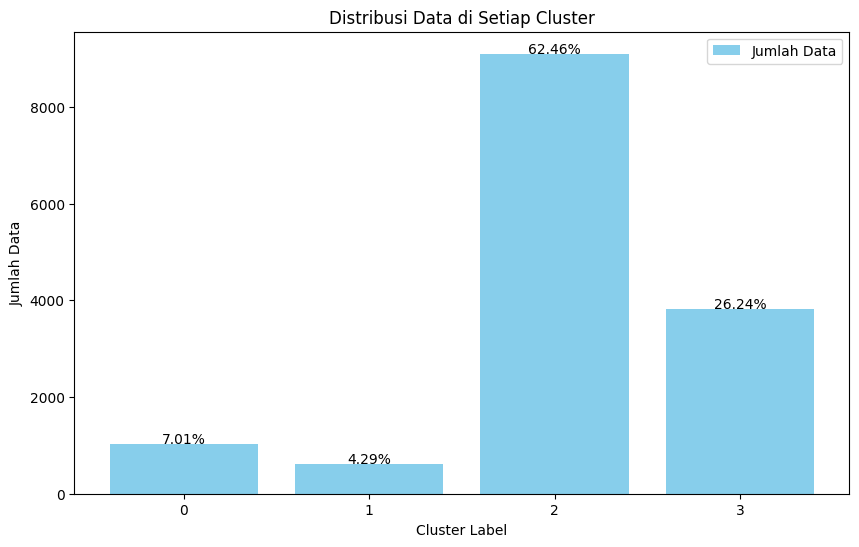

In [250]:
import matplotlib.pyplot as plt

# Hitung jumlah data di setiap cluster
cluster_counts = orderreviews_lowrate_df['cluster_label'].value_counts()
# Hitung total data
total_data = len(orderreviews_lowrate_df)
# Hitung persentase jumlah data di setiap cluster
cluster_percentages = (cluster_counts / total_data) * 100
# Plot grafik batang dengan presentase
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue', label='Jumlah Data')
plt.xlabel('Cluster Label')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Data di Setiap Cluster')
plt.xticks(cluster_counts.index)
# Tambahkan label persentase di atas setiap bar
for bar, percentage in zip(bars, cluster_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, f'{percentage:.2f}%', ha='center')
plt.legend()
plt.show()


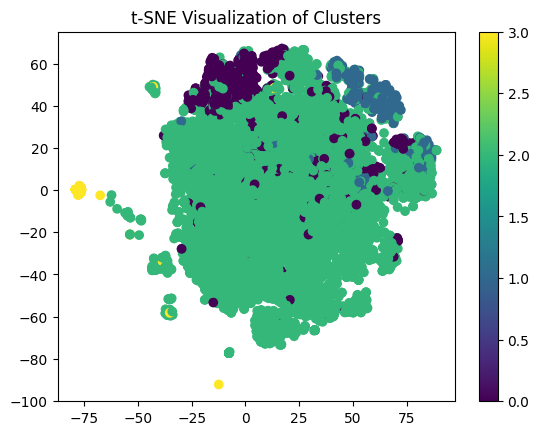

In [251]:

# Reduksi dimensi menggunakan TruncatedSVD (untuk mengubah matriks sparse menjadi dense)
# dan kemudian menggunakan t-SNE pada matriks dense hasil SVD
tsvd = TruncatedSVD(n_components=50)  # Ubah n_components sesuai kebutuhan
normalizer = Normalizer(copy=False)
tsne = TSNE(n_components=2, random_state=42)
# Pipeline untuk menggabungkan proses reduksi dimensi
pipeline = Pipeline([
    ('svd', tsvd),
    ('norm', normalizer),
    ('tsne', tsne)
])
# Perform t-SNE on the TF-IDF data
tsne_result = pipeline.fit_transform(X.toarray())
# Get the cluster labels
cluster_labels = orderreviews_lowrate_df['cluster_label']
# Plot hasil clustering menggunakan t-SNE
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.colorbar()
plt.show()




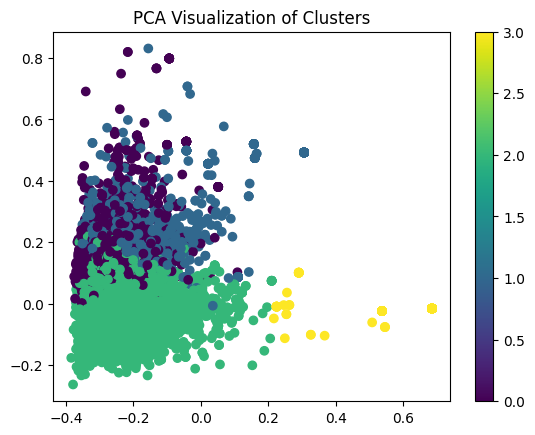

In [252]:

# Ambil matriks fitur hasil clustering (X) dan label kluster
X = tfidf_vectorizer.transform(orderreviews_lowrate_df['review_comment_message'])
cluster_labels = orderreviews_lowrate_df['cluster_label']

# Terapkan PCA dengan 3 komponen untuk visualisasi 2D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Plot hasil clustering menggunakan PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA Visualization of Clusters')
plt.colorbar()
plt.show()


In [253]:
orderreviews_lowrate_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,tokens,stemmed_tokens,cluster_label
0,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Não recomendo,não recebi o produto,2018-04-13,2018-04-16 00:39:37,"[recebi, produto]","[recebi, produto]",3
1,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,péssimo,2018-08-15,2018-08-15 04:10:37,[péssimo],[péssimo],2
2,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,Não recomendo,não gostei comprei gato por lebre,2017-12-13,2017-12-16 07:14:07,"[gostei, comprei, gato, lebre]","[gostei, comprei, gato, lebr]",2
3,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,Não recomendo,sempre compro pela internet e a entrega ocorre...,2018-04-08,2018-04-09 12:22:39,"[sempre, compro, internet, entrega, ocorre, an...","[sempr, compro, internet, entrega, ocorr, ant,...",2
4,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,Não recomendo,nada de chegar o meu pedido,2017-04-21,2017-04-23 05:37:03,"[nada, chegar, pedido]","[nada, chegar, pedido]",2


In [254]:

# Ambil tanggal terakhir dalam dataset
last_date_in_dataset = orderreviews_lowrate_df['review_creation_date'].max()

# Hitung tanggal 1 tahun sebelum tanggal terakhir
one_year_ago = last_date_in_dataset - timedelta(days=365)

# Filter data hanya untuk satu tahun terakhir
data_last_year = orderreviews_lowrate_df[orderreviews_lowrate_df['review_creation_date'] >= one_year_ago]

# Hitung jumlah ulasan per bulan
review_counts_per_month = data_last_year.resample('M', on='review_creation_date').size()
print(review_counts_per_month)



review_creation_date
2017-08-31      20
2017-09-30     521
2017-10-31     540
2017-11-30     640
2017-12-31    1478
2018-01-31     926
2018-02-28     981
2018-03-31    1832
2018-04-30    1392
2018-05-31     903
2018-06-30     823
2018-07-31     583
2018-08-31    1092
Freq: M, dtype: int64


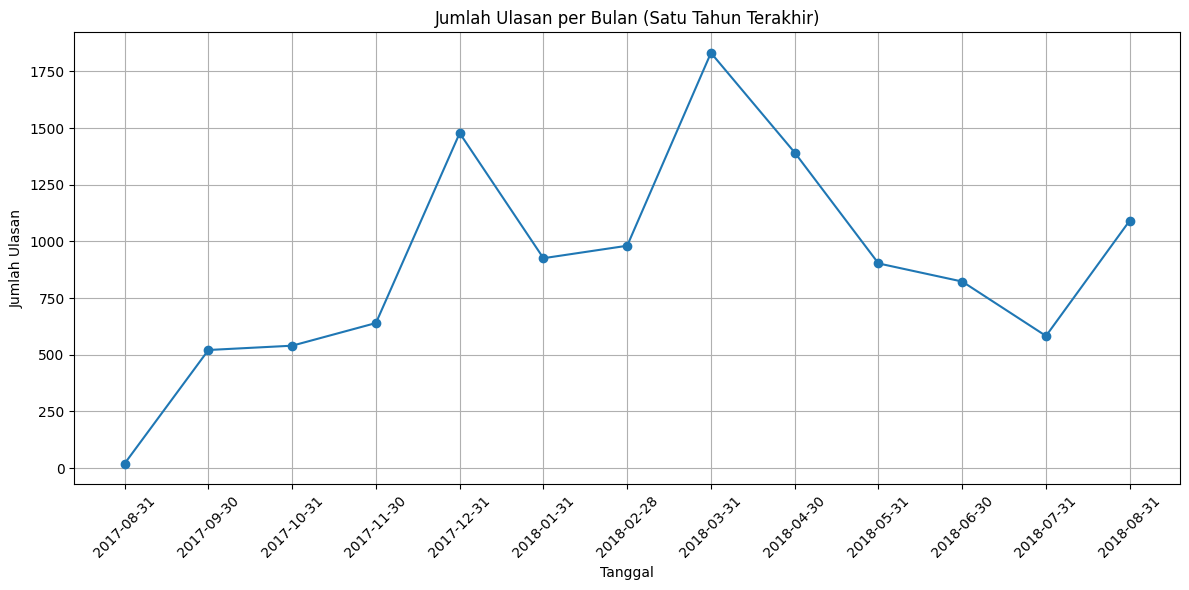

In [255]:


# Ambil tanggal terakhir dalam dataset
last_date_in_dataset = orderreviews_lowrate_df['review_creation_date'].max()
# Hitung tanggal 1 tahun sebelum tanggal terakhir
one_year_ago = last_date_in_dataset - timedelta(days=365)
# Filter data hanya untuk satu tahun terakhir
data_last_year = orderreviews_lowrate_df[orderreviews_lowrate_df['review_creation_date'] >= one_year_ago]
# Hitung jumlah ulasan per bulan
review_counts_per_month = data_last_year.resample('M', on='review_creation_date').size()
# Buat urutan tanggal dengan frekuensi M (akhir setiap bulan)
date_sequence = pd.date_range(start=one_year_ago, periods=len(review_counts_per_month), freq=MonthEnd())
# Ambil tanggal dalam format tahun-bulan-hari
formatted_dates = [date.strftime('%Y-%m-%d') for date in date_sequence]
# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(formatted_dates, review_counts_per_month.values, marker='o')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Ulasan')
plt.title('Jumlah Ulasan per Bulan (Satu Tahun Terakhir)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotasi label tanggal sebesar 45 derajat
plt.tight_layout()
plt.show()


In [273]:
orderr_df=pd.merge(
    left=orderreviews_lowrate_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

orderr_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,tokens,stemmed_tokens,cluster_label,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Não recomendo,não recebi o produto,2018-04-13,2018-04-16 00:39:37,"[recebi, produto]","[recebi, produto]",3,eecafc3ff695f031bfe354a9fff9d437,delivered,2018-04-06 22:18:54,2018-04-09 20:10:35,2018-04-11 16:48:35,2018-04-12 17:17:53,2018-05-03
1,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,péssimo,2018-08-15,2018-08-15 04:10:37,[péssimo],[péssimo],2,e545e697bb9d1b81e0a702121d4e94d5,canceled,2018-08-04 19:25:07,2018-08-05 19:24:33,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-08-13
2,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,Não recomendo,não gostei comprei gato por lebre,2017-12-13,2017-12-16 07:14:07,"[gostei, comprei, gato, lebre]","[gostei, comprei, gato, lebr]",2,5bb8de60ca2ca8b01a5ce471802fe10b,delivered,2017-11-24 01:40:48,2017-11-24 01:49:34,2017-12-06 15:19:09,2017-12-13 00:28:44,2017-12-19
3,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,Não recomendo,sempre compro pela internet e a entrega ocorre...,2018-04-08,2018-04-09 12:22:39,"[sempre, compro, internet, entrega, ocorre, an...","[sempr, compro, internet, entrega, ocorr, ant,...",2,30e6e854c81fa16f46a5d7f3ab025e6f,delivered,2018-03-16 12:51:35,2018-03-16 13:09:21,2018-03-20 18:32:31,2018-04-11 02:12:46,2018-04-06
4,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,Não recomendo,nada de chegar o meu pedido,2017-04-21,2017-04-23 05:37:03,"[nada, chegar, pedido]","[nada, chegar, pedido]",2,c17d38e818f10c91ebcd036bc835a648,delivered,2017-03-16 14:36:05,2017-03-16 14:36:05,2017-03-20 07:39:53,2017-04-24 09:18:11,2017-04-19


In [274]:
orderr_df.drop(['review_id','review_answer_timestamp','tokens','stemmed_tokens','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], axis=1, inplace=True)
orderr_df.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,cluster_label,customer_id,order_status
0,b18dcdf73be66366873cd26c5724d1dc,1,Não recomendo,não recebi o produto,2018-04-13,3,eecafc3ff695f031bfe354a9fff9d437,delivered
1,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,péssimo,2018-08-15,2,e545e697bb9d1b81e0a702121d4e94d5,canceled
2,0ce9a24111d850192a933fcaab6fbad3,1,Não recomendo,não gostei comprei gato por lebre,2017-12-13,2,5bb8de60ca2ca8b01a5ce471802fe10b,delivered
3,68e55ca79d04a79f20d4bfc0146f4b66,1,Não recomendo,sempre compro pela internet e a entrega ocorre...,2018-04-08,2,30e6e854c81fa16f46a5d7f3ab025e6f,delivered
4,3c314f50bc654f3c4e317b055681dff9,1,Não recomendo,nada de chegar o meu pedido,2017-04-21,2,c17d38e818f10c91ebcd036bc835a648,delivered


In [258]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [275]:
city_df=pd.merge(
    left=orderr_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

city_df.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,cluster_label,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b18dcdf73be66366873cd26c5724d1dc,1,Não recomendo,não recebi o produto,2018-04-13,3,eecafc3ff695f031bfe354a9fff9d437,delivered,bda84be75dfc9588ae63cfe827080b9b,1536,sao paulo,SP
1,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,péssimo,2018-08-15,2,e545e697bb9d1b81e0a702121d4e94d5,canceled,cdbbafa842e30d5e79dcef5bdc118831,7175,guarulhos,SP
2,0ce9a24111d850192a933fcaab6fbad3,1,Não recomendo,não gostei comprei gato por lebre,2017-12-13,2,5bb8de60ca2ca8b01a5ce471802fe10b,delivered,75a8009b779f5925f34196f17b19962a,22450,rio de janeiro,RJ
3,68e55ca79d04a79f20d4bfc0146f4b66,1,Não recomendo,sempre compro pela internet e a entrega ocorre...,2018-04-08,2,30e6e854c81fa16f46a5d7f3ab025e6f,delivered,660786ed04a09347d8820938113f1df7,93260,esteio,RS
4,3c314f50bc654f3c4e317b055681dff9,1,Não recomendo,nada de chegar o meu pedido,2017-04-21,2,c17d38e818f10c91ebcd036bc835a648,delivered,3b81cc8417be691f3159596da7e08a3c,64980,corrente,PI


In [260]:
city_df.to_csv("city_df.csv", index=False)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

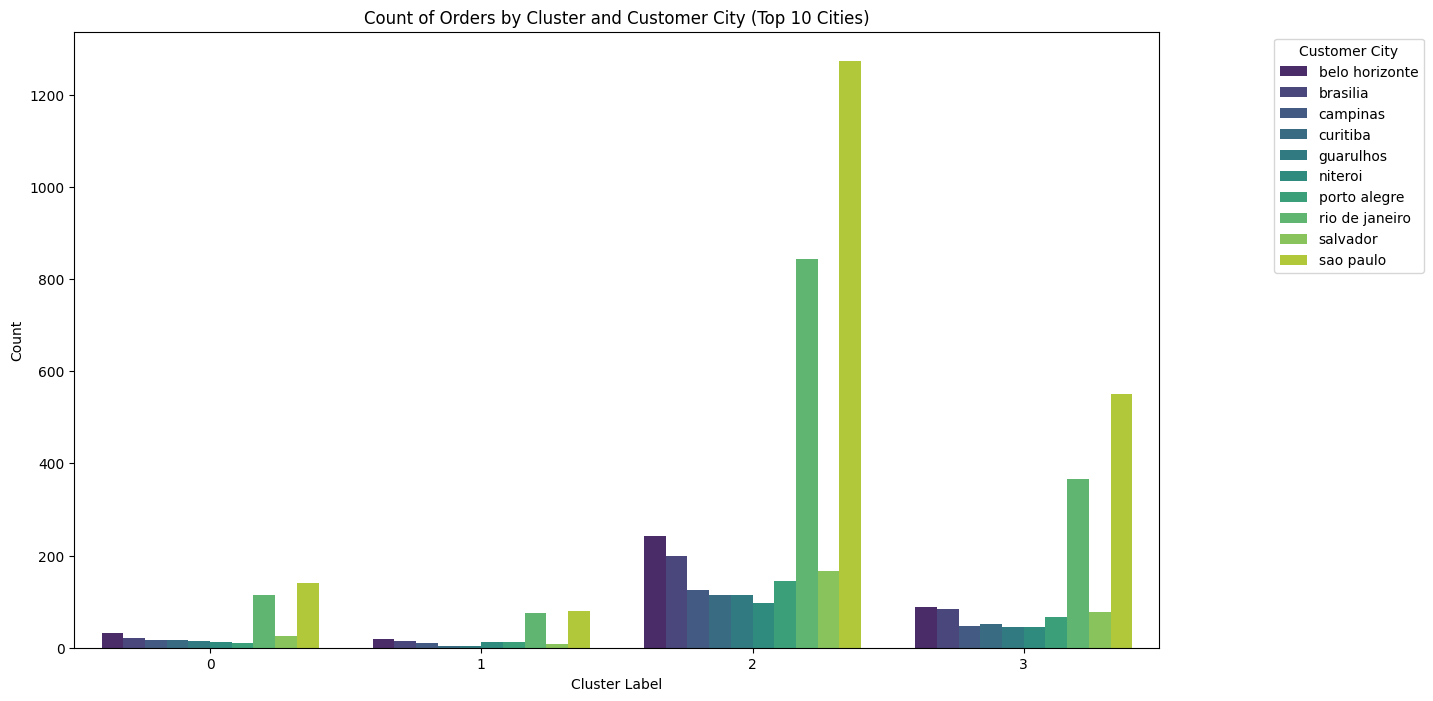

In [261]:


# Ambil 10 kota terbanyak
top_10_cities = city_df['customer_city'].value_counts().nlargest(10).index
# Filter DataFrame hanya untuk 10 kota teratas
top_10_cities_df = city_df[city_df['customer_city'].isin(top_10_cities)]
# Group by 'cluster_label' and 'customer_city', then count the occurrences
grouped_data = top_10_cities_df.groupby(['cluster_label', 'customer_city']).size().reset_index(name='count')
# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='cluster_label', y='count', hue='customer_city', palette='viridis')
# Add title and labels
plt.title('Count of Orders by Cluster and Customer City (Top 10 Cities)')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
# Show legend
plt.legend(title='Customer City', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()



In [262]:
productcategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [263]:
produk_df=pd.merge(
    left=productcategory_df,
    right=products_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

produk_df.head()

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0


In [264]:
produk_df.drop(['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm'], axis=1, inplace=True)
produk_df.head()

,product_category_name_english,product_id
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8
2,health_beauty,36555a2f528d7b2a255c504191445d39
3,health_beauty,e586ebb6022265ae1eea38f46ffe3ead
4,health_beauty,75b4372e69a42f8ae1d908c076f547b2


In [265]:
produkk_df=pd.merge(
    left=orderitem_df,
    right=produk_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

produkk_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [266]:
produkk_df.drop(['order_item_id','product_id','seller_id','shipping_limit_date','price','freight_value'], axis=1, inplace=True)
produkk_df.head()

,order_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools


In [267]:
all_df= pd.merge(
    left=city_df,
    right=produkk_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,cluster_label,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,b18dcdf73be66366873cd26c5724d1dc,1,Não recomendo,não recebi o produto,2018-04-13,3,eecafc3ff695f031bfe354a9fff9d437,delivered,bda84be75dfc9588ae63cfe827080b9b,1536,sao paulo,SP,bed_bath_table
1,b18dcdf73be66366873cd26c5724d1dc,1,Não recomendo,não recebi o produto,2018-04-13,3,eecafc3ff695f031bfe354a9fff9d437,delivered,bda84be75dfc9588ae63cfe827080b9b,1536,sao paulo,SP,bed_bath_table
2,b18dcdf73be66366873cd26c5724d1dc,1,Não recomendo,não recebi o produto,2018-04-13,3,eecafc3ff695f031bfe354a9fff9d437,delivered,bda84be75dfc9588ae63cfe827080b9b,1536,sao paulo,SP,bed_bath_table
3,b18dcdf73be66366873cd26c5724d1dc,1,Não recomendo,não recebi o produto,2018-04-13,3,eecafc3ff695f031bfe354a9fff9d437,delivered,bda84be75dfc9588ae63cfe827080b9b,1536,sao paulo,SP,bed_bath_table
4,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,péssimo,2018-08-15,2,e545e697bb9d1b81e0a702121d4e94d5,canceled,cdbbafa842e30d5e79dcef5bdc118831,7175,guarulhos,SP,luggage_accessories


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

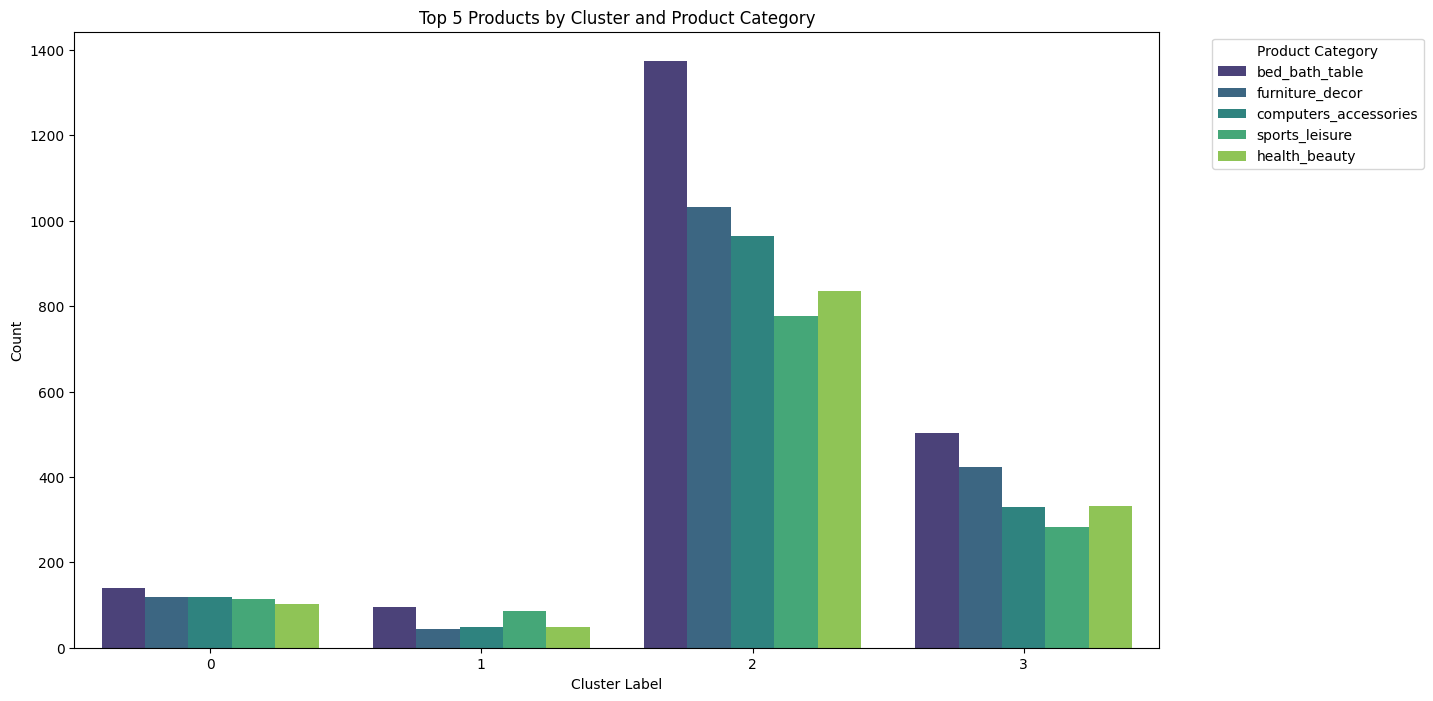

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get top n products in each cluster
def get_top_products(cluster_data, n=5):
    top_products = cluster_data.sort_values(by='count', ascending=False).head(n)
    return top_products

# Group by 'cluster_label' and 'product_category_name_english', then count the occurrences
grouped_data = all_df.groupby(['cluster_label', 'product_category_name_english']).size().reset_index(name='count')

# Get the top 5 products in each cluster
top_products_by_cluster = grouped_data.groupby('cluster_label', group_keys=False).apply(get_top_products, n=5)

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products_by_cluster, x='cluster_label', y='count', hue='product_category_name_english', palette='viridis')

# Add title and labels
plt.title('Top 5 Products by Cluster and Product Category')
plt.xlabel('Cluster Label')
plt.ylabel('Count')

# Show legend
plt.legend(title='Product Category', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()



In [269]:
all_df.to_csv("all_data.csv", index=False)